In [24]:
import pandas as pd
import pandas as pd

test = pd.read_csv("001_test.csv")
dev = pd.read_csv("001_dev.csv")
train = pd.read_csv("001_train.csv")
df = pd.read_json("004_results_new_new.jsonl", lines=True)
labels = [
'happiness', 
'neutral', 
'sadness',
'fear', 
'anger', 
]
from sklearn.metrics import accuracy_score, f1_score
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"],
                                                     row["y_pred"],
                                                     ), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"],
                                              row["y_pred"], average="macro", labels=labels), axis=1)

# df = df[df.split.str.contains("test")]
# df = df.iloc[[i for i in range(df.shape[0]) if i%3 != 0], :].reset_index(drop=True)
df.model_name_or_path.value_counts()

classla/wav2vec2-large-slavic-parlaspeech-hr    16
facebook/wav2vec2-large-960h-lv60-self          12
facebook/wav2vec2-large-slavic-voxpopuli-v2     12
Name: model_name_or_path, dtype: int64

In [25]:
ids = []
sp_ids = []
for i, row in df.iterrows():
    if "test" in row["split"] :
        ids.append(
            test.utterance_id.tolist()
        )
        sp_ids.append(
            test.speaker_id.tolist()
        )
    else:
        ids.append(
            dev.utterance_id.tolist()
        )
        sp_ids.append(
            dev.speaker_id.tolist()
        )
df["utterance_ids"] = ids
df["speaker_ids"] = sp_ids
for i, row in df.iterrows():
    assert len(row["utterance_ids"]) == len(row["y_pred"])

In [26]:
df.groupby(["model_name_or_path", "split"]).agg(
    {"accuracy": ["mean", "std"],
     "macroF1": ["mean", "std"]}
)

accuracy            \
                                                        mean       std   
model_name_or_path                           split                       
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.742124  0.022627   
                                             test   0.704950  0.012909   
facebook/wav2vec2-large-960h-lv60-self       dev    0.686881  0.014188   
                                             test   0.673267  0.050485   
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.701733  0.006875   
                                             test   0.663366  0.011433   

                                                     macroF1            
                                                        mean       std  
model_name_or_path                           split                      
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.726496  0.025308  
                                             test   0.678567  0.014185  
facebook/wav2vec2-large-960h-lv60-self       dev    0.669255  0.015725  
                                             test   0.643226  0.056842  
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.684856  0.004059  
                                             test   0.637432  0.011938

In [27]:
df[["model_name_or_path", "split", "accuracy", "macroF1"]].set_index(["model_name_or_path", "split"]).sort_index()

accuracy   macroF1
model_name_or_path                           split                    
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.717822  0.698363
                                             dev    0.762376  0.746459
                                             dev    0.762376  0.746459
                                             dev    0.737624  0.723177
                                             dev    0.737624  0.723177
                                             dev    0.747525  0.732281
                                             dev    0.747525  0.732281
                                             dev    0.767327  0.756437
                                             dev    0.767327  0.756437
                                             dev    0.707921  0.688192
                                             dev    0.707921  0.688192
                                             test   0.702970  0.675933
                                             test   0.683168  0.655332
                                             test   0.712871  0.682479
                                             test   0.712871  0.690455
                                             test   0.712871  0.688637
facebook/wav2vec2-large-960h-lv60-self       dev    0.673267  0.655336
                                             dev    0.673267  0.655336
                                             dev    0.707921  0.694012
                                             dev    0.707921  0.694012
                                             dev    0.688119  0.664110
                                             dev    0.688119  0.664110
                                             dev    0.678218  0.663562
                                             dev    0.678218  0.663562
                                             test   0.673267  0.634223
                                             test   0.742574  0.724647
                                             test   0.653465  0.620447
                                             test   0.623762  0.593590
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.698020  0.682529
                                             dev    0.698020  0.682529
                                             dev    0.698020  0.682529
                                             dev    0.698020  0.682529
                                             dev    0.698020  0.682942
                                             dev    0.698020  0.682942
                                             dev    0.712871  0.691425
                                             dev    0.712871  0.691425
                                             test   0.673267  0.647169
                                             test   0.673267  0.647169
                                             test   0.653465  0.632611
                                             test   0.653465  0.622780

In [28]:
df.y_pred.apply(str).value_counts().tolist()

[4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [29]:
df.groupby(["model_name_or_path", "split"]).aggregate({
    "y_pred": [lambda i: len(i.apply(str).value_counts().tolist()),
               lambda i: len(i)]
}).rename(columns={"<lambda_0>": "unique predictios", "<lambda_1>": "num of predictions"})

y_pred  \
                                                   unique predictios   
model_name_or_path                           split                     
classla/wav2vec2-large-slavic-parlaspeech-hr dev                   6   
                                             test                  5   
facebook/wav2vec2-large-960h-lv60-self       dev                   4   
                                             test                  4   
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev                   3   
                                             test                  3   

                                                                       
                                                   num of predictions  
model_name_or_path                           split                     
classla/wav2vec2-large-slavic-parlaspeech-hr dev                   11  
                                             test                   5  
facebook/wav2vec2-large-960h-lv60-self       dev                    8  
                                             test                   4  
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev                    8  
                                             test                   4

In [30]:
df.groupby(["split"]).aggregate({
    "y_pred": [lambda i: len(i.apply(str).value_counts().tolist()),
               lambda i: len(i)]
}).rename(columns={"<lambda_0>": "unique predictions", "<lambda_1>": "num of predictions"})

y_pred                   
      unique predictions num of predictions
split                                      
dev                   13                 27
test                  12                 13

In [31]:
def get_per_speaker_error_rate(row):
    speakers = row["speaker_ids"]
    y_true = row["y_true"]
    y_pred = row["y_pred"]
    
    df = pd.DataFrame(data={
        "speaker": speakers,
        "y_true": y_true,
        "y_pred": y_pred
    })
    df["correct"] = df.y_true == df.y_pred
    import numpy as np
    return df.groupby("speaker").aggregate({"correct": "mean"  })

correct_breakdown = []

for i, row in df.iterrows():
    correct_breakdown.append(
        get_per_speaker_error_rate(row).correct.to_json()
    )
df["correct_ratio_breakdown"] = correct_breakdown

    


<AxesSubplot:xlabel='speaker', ylabel='correct_ratio'>

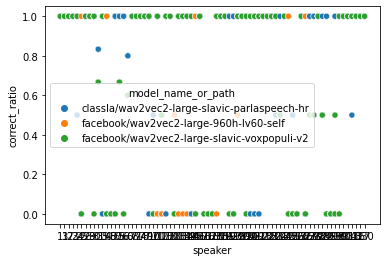

In [32]:
from ast import literal_eval
s = df[df.split == "test"].correct_ratio_breakdown.apply(literal_eval).apply(pd.Series)
# s["model_name_or_path"] = df[df.split=="test"].model_name_or_path.tolist()

models = df[df.split=="test"].model_name_or_path.tolist()
new_models = [models[i] for j in range(73) for i in range(13)]

        
ndf = s.melt().rename(columns={
    "variable": "speaker",
    "value": "correct_ratio"
})
ndf["model_name_or_path"] = new_models
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=ndf, x="speaker", y="correct_ratio", hue="model_name_or_path" )

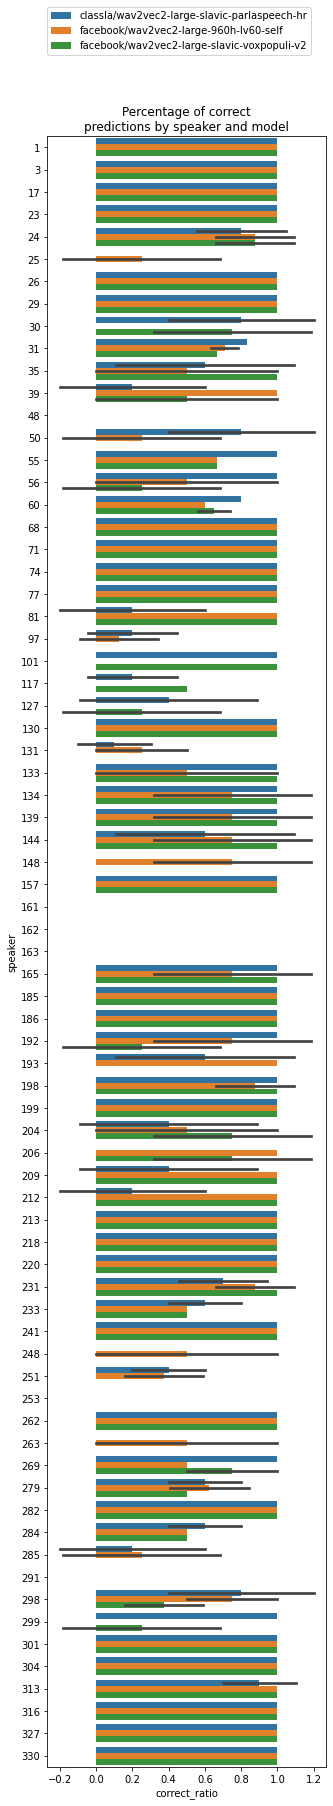

In [33]:
gb = ndf.groupby("speaker").aggregate({
    "correct_ratio": ["mean", "std"]
})

plt.figure(figsize=(5, 30))
sns.barplot(data = ndf, y = "speaker" , x = "correct_ratio", hue="model_name_or_path", ci="sd")
plt.title("Percentage of correct\npredictions by speaker and model")
plt.legend(loc=(0, 1.05))
# plt.tight_layout()
plt.savefig("images/006_speaker_and_model_correctness.pdf", dpi=200)
plt.show()

In [36]:
test_speakers = set(test.speaker_id.tolist())
dev_speakers = set(dev.speaker_id.tolist())
train_speakers = set(train.speaker_id.tolist())

In [46]:
d = {"test_speakers": test_speakers,
     "dev_speakers": dev_speakers, 
     "train_speakers": train_speakers}

for first in d:
    for second in d:
        if first == second:
            continue
        print(f"{first} against {second}: {len(d[first].intersection(d[second]))} leaked")

test_speakers against dev_speakers: 36 leaked
test_speakers against train_speakers: 53 leaked
dev_speakers against test_speakers: 36 leaked
dev_speakers against train_speakers: 97 leaked
train_speakers against test_speakers: 53 leaked
train_speakers against dev_speakers: 97 leaked


In [43]:
train_speakers.__str__()

'{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 125, 126, 128, 129, 131, 133, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 160, 161, 164, 166, 167, 170, 171, 172, 174, 175, 176, 177, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 226, 227, 228, 230, 231, 234, 236, 237, 238, 240, 241, 242, 243, 244, 245, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 275, 277, 278, 279, 280, 

In [59]:
set(ndf.sort_values(by="correct_ratio", ascending=True).speaker[:54].tolist())

{'117', '127', '131', '133', '163', '251', '253', '263', '56', '81'}